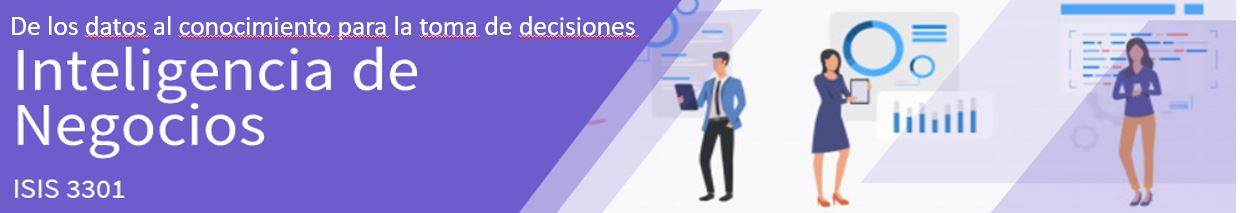

In [141]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


In [142]:
df_movies=pd.read_csv('E:/Downloads/202320_Laboratorio 1 - Agrupación_data_MovieAlpes_data.csv',delimiter=";", encoding = "ISO-8859-1")

### 1 Perfilamiento de datos

In [143]:
df_movies.shape

(7471, 18)

In [144]:
df_movies.head()

,#,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,language,types,attributes,isOriginalTitle,main_genre,secondary_genre
0,1,1,tt0103064,movie,Terminator 2: Judgment Day,0.0,1991.0,137,8.6,1128166.0,17.0,US,en,dvd,\N,0.0,Action,Sci-Fi
1,10,17,tt0231050,tvSeries,ToransufÃÂ´mÃÂ¢: KÃÂ¢robotto,0.0,2000.0,22,6.6,577.0,16.0,US,en,alternative,\N,0.0,Action,Adventure
2,13,23,tt0253474,movie,The Pianist,0.0,2002.0,150,8.5,860569.0,7.0,US,en,imdbDisplay,\N,0.0,Biography,Drama
3,21,55,tt0369339,movie,Collateral,0.0,2004.0,120,7.5,417391.0,6.0,US,en,imdbDisplay,\N,0.0,Action,Crime
4,28,87,tt0439547,movie,2 Filhos de Francisco: A HistÃÂ³ria de ZezÃÂ...,0.0,2005.0,132,6.9,5946.0,5.0,US,en,imdbDisplay,\N,0.0,Biography,Drama


In [145]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7471 entries, 0 to 7470
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                7471 non-null   int64  
 1   index            7471 non-null   int64  
 2   tconst           7471 non-null   object 
 3   titleType        7471 non-null   object 
 4   originalTitle    7471 non-null   object 
 5   isAdult          7470 non-null   float64
 6   startYear        7470 non-null   float64
 7   runtimeMinutes   7470 non-null   object 
 8   averageRating    7470 non-null   float64
 9   numVotes         7470 non-null   float64
 10  ordering         7470 non-null   float64
 11  region           7470 non-null   object 
 12  language         7470 non-null   object 
 13  types            7470 non-null   object 
 14  attributes       7470 non-null   object 
 15  isOriginalTitle  7470 non-null   float64
 16  main_genre       7470 non-null   object 
 17  secondary_genr

In [146]:
df_movies.describe()

,#,index,isAdult,startYear,averageRating,numVotes,ordering,isOriginalTitle
count,7471.000000,7471.000000,7470.0,7470.000000,7470.000000,7.470000e+03,7470.000000,7470.0
mean,4043.482666,5440.458439,0.0,2013.157296,7.475676,7.282830e+04,16.567604,0.0
std,2192.753689,2752.820924,0.0,6.979151,2.771444,1.640233e+05,12.761147,0.0
min,1.000000,1.000000,0.0,1990.000000,6.500000,1.000000e+01,1.000000,0.0
25%,2152.500000,3073.500000,0.0,2008.000000,6.900000,6.265250e+03,6.000000,0.0
50%,4033.000000,5421.000000,0.0,2015.000000,7.300000,1.527900e+04,14.000000,0.0
75%,5914.500000,7641.500000,0.0,2019.000000,7.800000,5.641975e+04,24.000000,0.0
max,7849.000000,10274.000000,0.0,2023.000000,92.000000,2.197234e+06,119.000000,0.0


In [147]:
df_movies.dtypes

#                    int64
index                int64
tconst              object
titleType           object
originalTitle       object
isAdult            float64
startYear          float64
runtimeMinutes      object
averageRating      float64
numVotes           float64
ordering           float64
region              object
language            object
types               object
attributes          object
isOriginalTitle    float64
main_genre          object
secondary_genre     object
dtype: object

### Manipulacion de datos

### 1.2 Prepara datos


Hay filas con atributos que no coinciden con el tipo de diccionario debido a esto deben ser cambiados


En este caso los datos son tconst y runtimeMinutes 

In [148]:
df_movies['newruntimeMinutes'] = pd.to_numeric(df_movies.runtimeMinutes, errors = 'coerce')
df_movies['newruntimeMinutes'].tail(10)

7461    116.0
7462    113.0
7463     30.0
7464    106.0
7465    102.0
7466    108.0
7467     25.0
7468     99.0
7469     84.0
7470     23.0
Name: newruntimeMinutes, dtype: float64

In [149]:
df_movies.head()
df_movies.dtypes
df_movies["newruntimeMinutes"].describe

<bound method NDFrame.describe of 0       137.0
1        22.0
2       150.0
3       120.0
4       132.0
        ...  
7466    108.0
7467     25.0
7468     99.0
7469     84.0
7470     23.0
Name: newruntimeMinutes, Length: 7471, dtype: float64>

In [150]:
df_movies['tconst'] = df_movies['tconst'].str.replace('tt', '').astype('int64')
df_movies['tconst'].tail(10)

7461    9617716
7462    9647768
7463    9698520
7464    9708358
7465    9789042
7466    9789686
7467    9814900
7468    9845110
7469    9845398
7470    9908860
Name: tconst, dtype: int64

In [151]:
df_movies.dtypes

#                      int64
index                  int64
tconst                 int64
titleType             object
originalTitle         object
isAdult              float64
startYear            float64
runtimeMinutes        object
averageRating        float64
numVotes             float64
ordering             float64
region                object
language              object
types                 object
attributes            object
isOriginalTitle      float64
main_genre            object
secondary_genre       object
newruntimeMinutes    float64
dtype: object

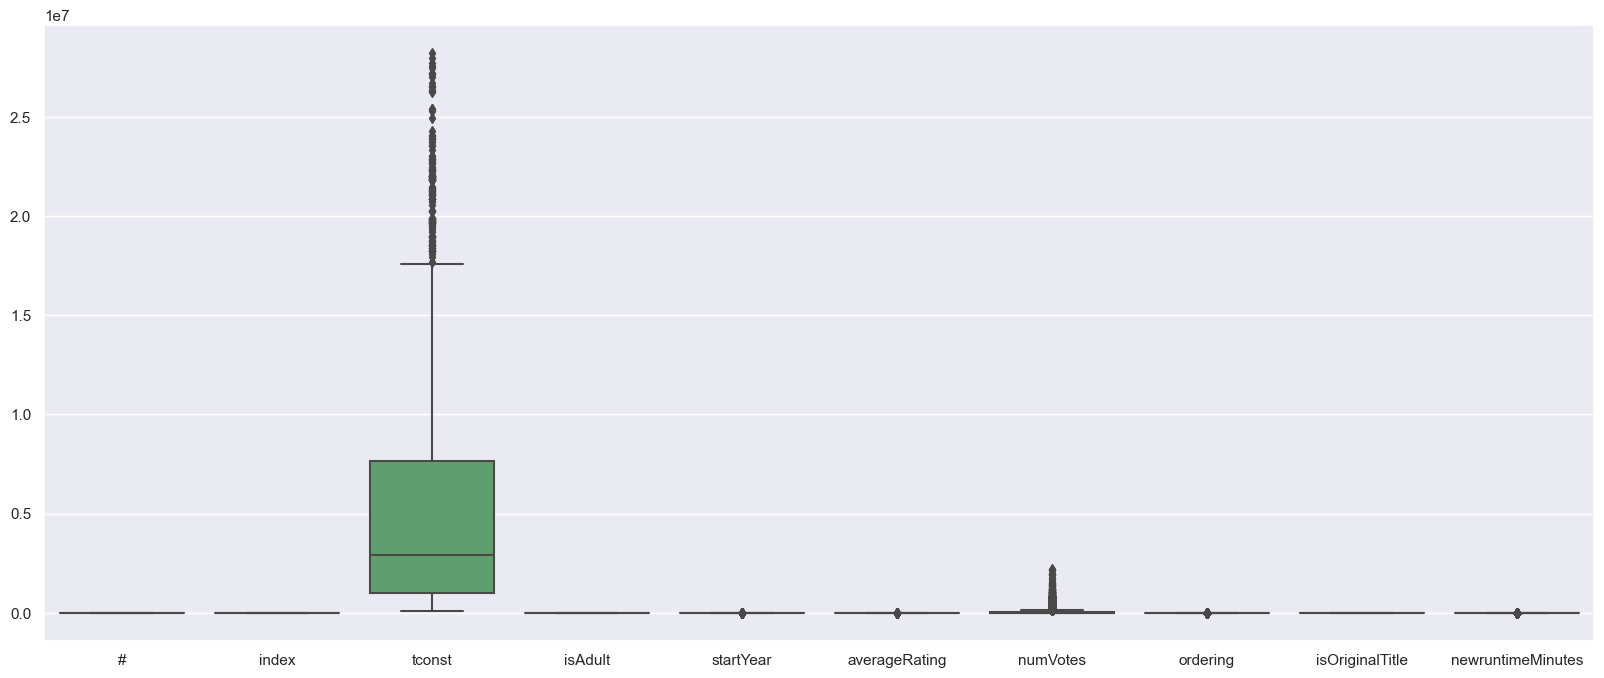

In [152]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies, orient="v")

Puedes ver las variables con dominios similares para entenderlas mejor. 
En este caso podrías quitar Speed_limit.

In [153]:
name_cols_float = df_movies.select_dtypes(include = ['float']).columns
name_cols_int = df_movies.select_dtypes(include = ['int64']).columns
name_cols_int

Index(['#', 'index', 'tconst'], dtype='object')

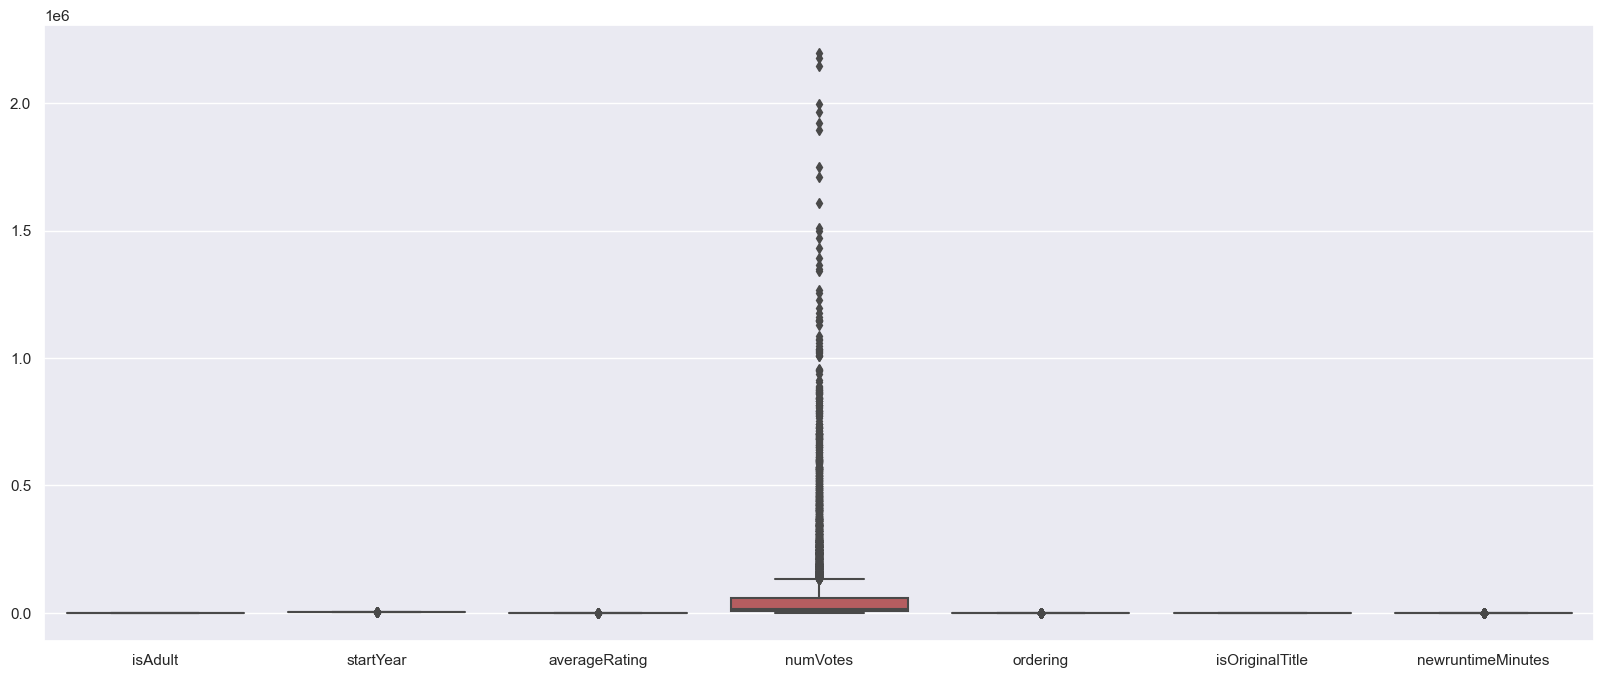

In [154]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies[name_cols_float], orient="v")

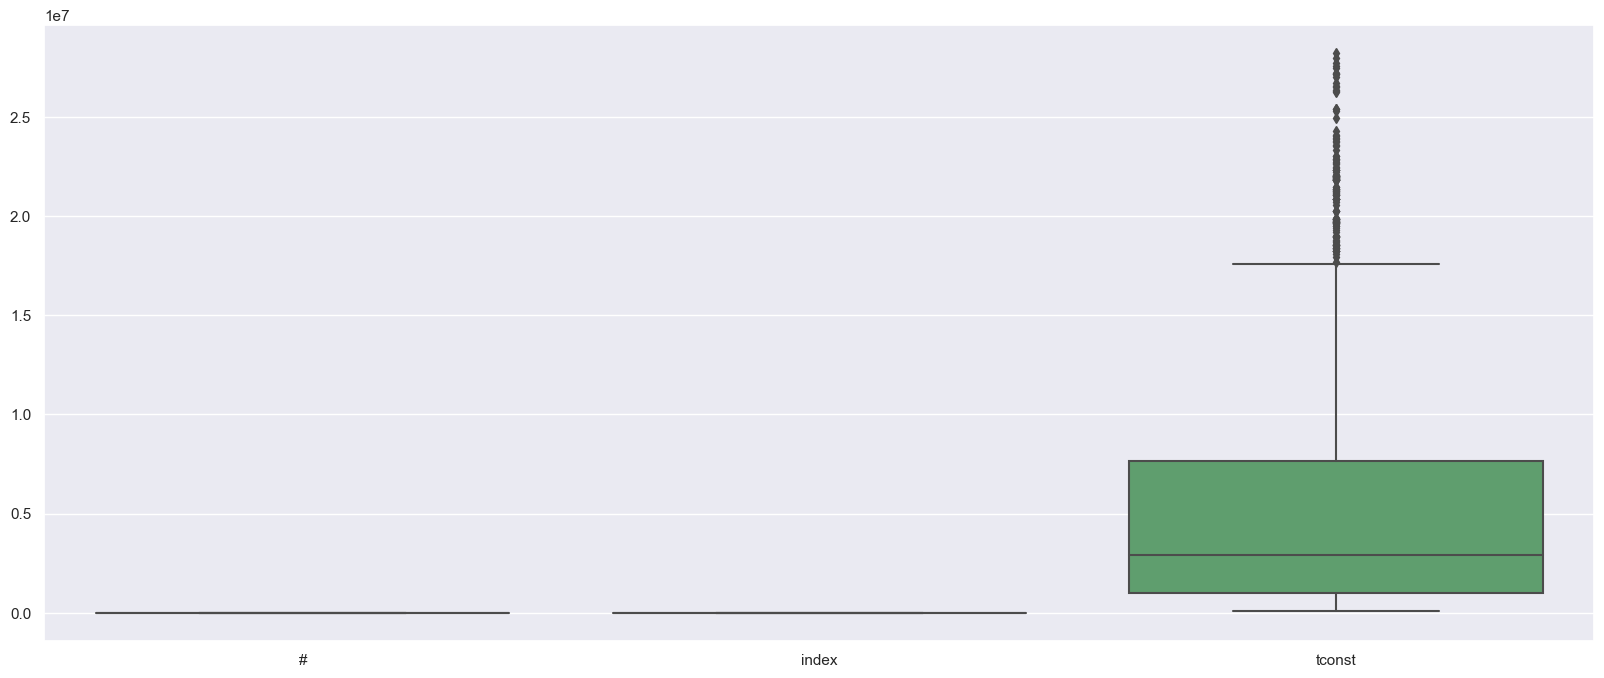

In [155]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies[name_cols_int], orient="v")

<Span style="color:red">¿Sabes qué sifnifican los puntos que se visualizan en este diagrama de cajas? ¿Serán candidatos a ser tratados? 
 Todas las variables que tienen tipo de dato int64, serán contínuas o categóricas? Revisa el diccionario de datos</Span>

In [156]:
name_cols_non_number = df_movies.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['titleType', 'originalTitle', 'runtimeMinutes', 'region', 'language',
       'types', 'attributes', 'main_genre', 'secondary_genre'],
      dtype='object')

In [157]:
df_movies[name_cols_non_number].describe()

,titleType,originalTitle,runtimeMinutes,region,language,types,attributes,main_genre,secondary_genre
count,7471,7471,7470,7470,7470,7470,7470,7470,7470
unique,7,7290,362,4,1,5,1,22,26
top,movie,Home,60,IN,en,imdbDisplay,\N,Drama,Drama
freq,4673,3,534,5590,7470,7395,7470,1767,2428


<Span style="color:red"> ¿Qué significa que Vehicle_Type tenga un valor de 1 en unique. Será importante? </Span>

In [158]:
# Revisamos en detalle el contenido de la columna Time
df_movies.runtimeMinutes.value_counts()

60     534
30     340
45     184
22     138
43     114
      ... 
257      1
228      1
275      1
311      1
460      1
Name: runtimeMinutes, Length: 362, dtype: int64

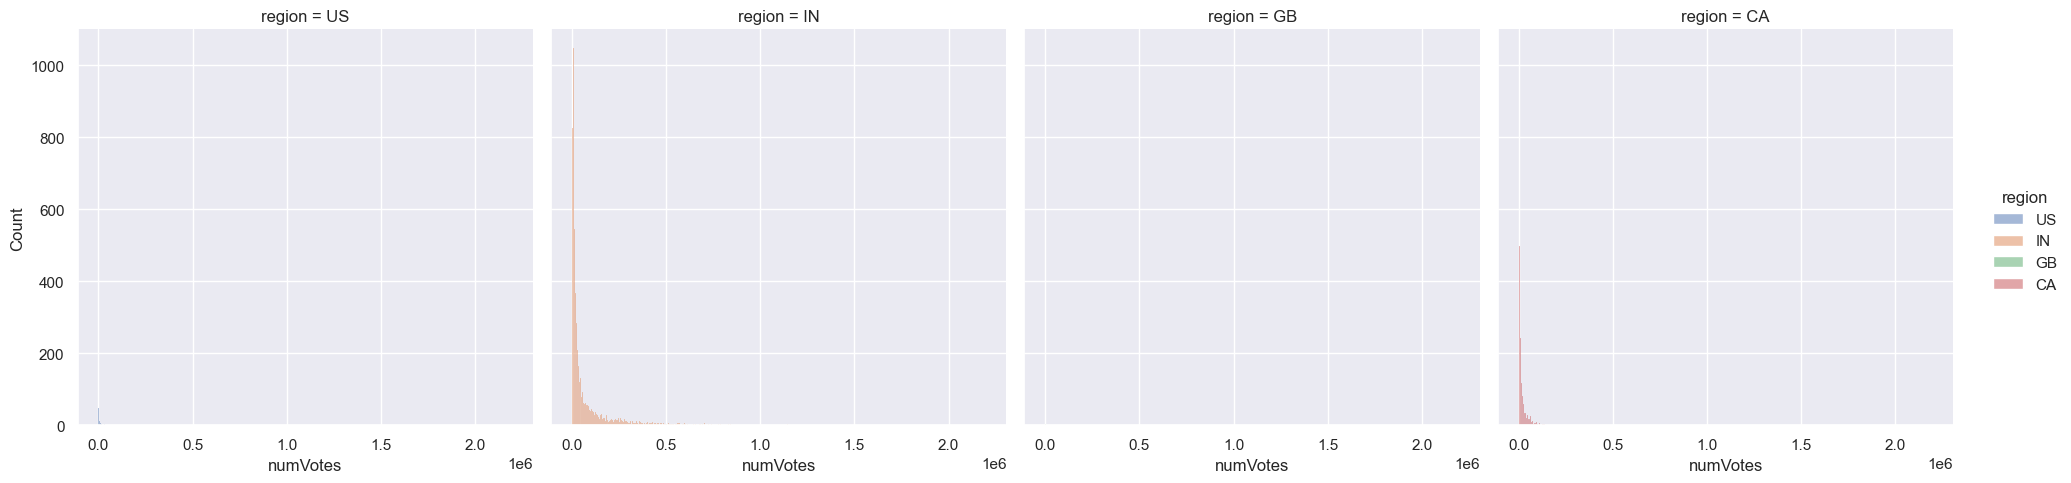

In [159]:
#Observar las distribuciones de "Accident_Severity" por cada valor de Time
sns.displot(data=df_movies, x="numVotes", hue="region", col="region")

Relacionado con la tarea de agrupación se sugiere analizar los grupos naturales entre variables para identificar variables candidatas a incluir en la agrupación. 

In [160]:
df_movies

,#,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,language,types,attributes,isOriginalTitle,main_genre,secondary_genre,newruntimeMinutes
0,1,1,103064,movie,Terminator 2: Judgment Day,0.0,1991.0,137,8.6,1128166.0,17.0,US,en,dvd,\N,0.0,Action,Sci-Fi,137.0
1,10,17,231050,tvSeries,ToransufÃÂ´mÃÂ¢: KÃÂ¢robotto,0.0,2000.0,22,6.6,577.0,16.0,US,en,alternative,\N,0.0,Action,Adventure,22.0
2,13,23,253474,movie,The Pianist,0.0,2002.0,150,8.5,860569.0,7.0,US,en,imdbDisplay,\N,0.0,Biography,Drama,150.0
3,21,55,369339,movie,Collateral,0.0,2004.0,120,7.5,417391.0,6.0,US,en,imdbDisplay,\N,0.0,Action,Crime,120.0
4,28,87,439547,movie,2 Filhos de Francisco: A HistÃÂ³ria de ZezÃÂ...,0.0,2005.0,132,6.9,5946.0,5.0,US,en,imdbDisplay,\N,0.0,Biography,Drama,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7466,7845,10269,9789686,movie,Un rubio,0.0,2019.0,108,7.3,3779.0,11.0,CA,en,imdbDisplay,\N,0.0,Drama,Romance,108.0
7467,7846,10270,9814900,tvSeries,Trailer Park Boys: The Animated Series,0.0,2019.0,25,7.5,3318.0,4.0,CA,en,imdbDisplay,\N,0.0,Animation,Comedy,25.0
7468,7847,10271,9845110,movie,Deux,0.0,2019.0,99,7.2,3346.0,29.0,CA,en,imdbDisplay,\N,0.0,Drama,Romance,99.0
7469,7848,10272,9845398,movie,Fin de siglo,0.0,2019.0,84,6.9,3646.0,6.0,CA,en,imdbDisplay,\N,0.0,Drama,No tiene,84.0


In [161]:
#Supongamos que los expertos quieren ver relaciones entre las variables: "Time","Number_of_Casualties","Day_of_Week","Speed_limit", "Light_Conditions"
cols_select=["startYear","numVotes","averageRating","ordering", "runtimeMinutes"]
df_movies_cols_sels=df_movies[cols_select].copy()

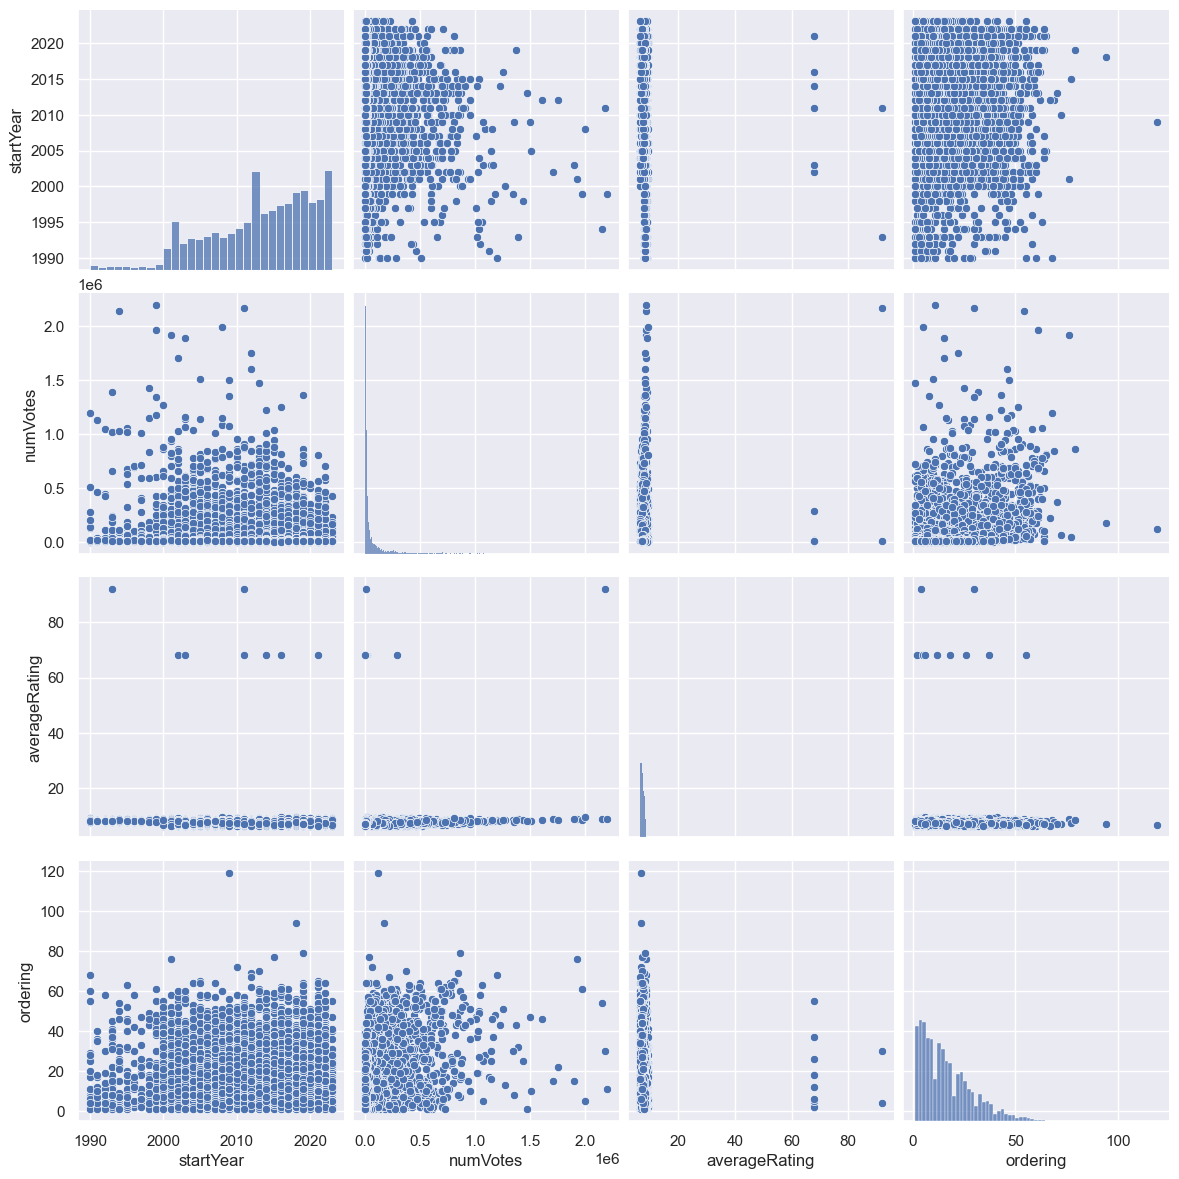

In [162]:
#Vámos las relaciones entre todas las variables numércias
sns.pairplot(df_movies_cols_sels, height=3,kind='scatter')

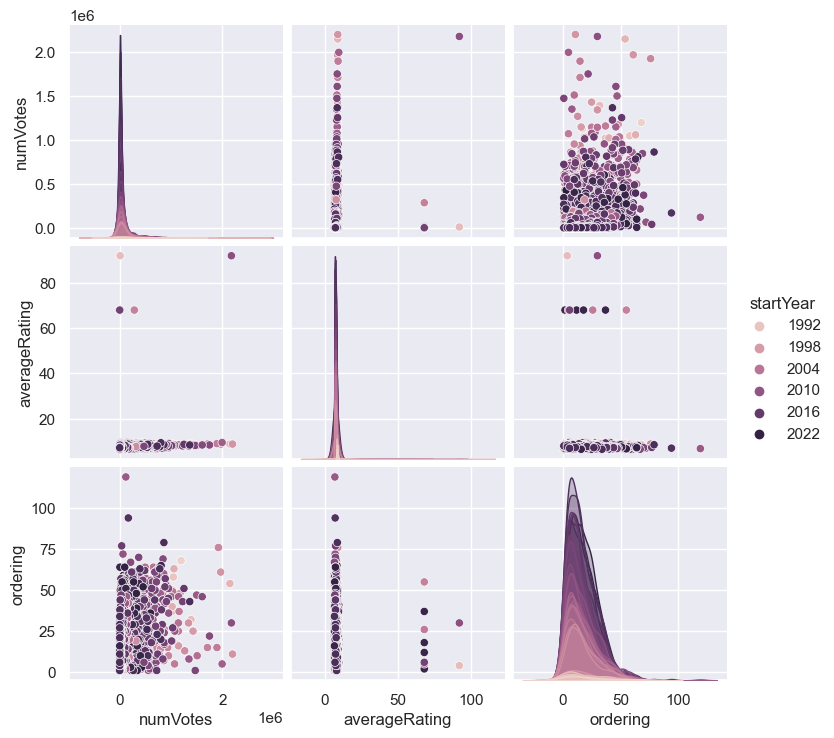

In [163]:
# En esta gráfica van a ver las relaciones entre Time y las otras variables numéricas
sns.pairplot(data=df_movies_cols_sels, hue="startYear")

**Análisis** 
1. Observamos que se identifican grupo naturales, por ejemplo: "Number_of_casualties" y "Ligh_Conditions" .con "Time", Vemos que el Valor 1 en Light_Conditions no tiene accidentes en la tarde y que cuando Number_of_Casualties es igual a 4, solo se presentan accidentes en las mañanas.
  
2. En este punto recuerde que puede llegar a conclusiones como, la variable "X" tiene varios formatos. 
3. La variable "Y"  según el diccionario tiene los siguientes valores posibles, pero en los datos identificamos estos otros valores "Z", que no conocemos.

Estos análisis nos ayudan a entender el conjunto de datos y a identificar posibles tareas de limpieza que se deben realizar en la etapa de preparación, antes de generar un modelo de agrupación.

In [164]:
#Consulto una muestra de datos para analizarlos mejor
df_movies[name_cols_non_number].sample(15)

,titleType,originalTitle,runtimeMinutes,region,language,types,attributes,main_genre,secondary_genre
4184,tvSeries,Knightfall,60,IN,en,imdbDisplay,\N,Action,Adventure
3985,tvSeries,Versailles,52,IN,en,imdbDisplay,\N,Biography,Drama
5727,movie,Titan A.E.,94,CA,en,imdbDisplay,\N,Action,Adventure
4416,tvSeries,Swedish Dicks,30,IN,en,imdbDisplay,\N,Comedy,Crime
4143,movie,20th Century Women,119,IN,en,imdbDisplay,\N,Comedy,Drama
2391,tvSeries,Sexify,40,IN,en,imdbDisplay,\N,Comedy,Drama
122,tvSeries,Homicide: Life on the Street,60,IN,en,imdbDisplay,\N,Crime,Drama
1140,tvSeries,Robin Hood,60,IN,en,imdbDisplay,\N,Action,Adventure
1840,tvMiniSeries,The Trials of Gabriel Fernandez,331,IN,en,imdbDisplay,\N,Crime,Documentary
6062,movie,Me and You and Everyone We Know,91,CA,en,imdbDisplay,\N,Comedy,Drama


### 3.2. Análisis de calidad de datos

Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez.
En particular miramos si se presenta algún problema de calidad relacionado con la dimensión y pensamos en opciones para su posterior corrección en la etapa de preparación. Esta actividad la hicimos en el notebook de entendimiento de datos y acá retomaremos los elementos más importantes, para ilustrar el concepto.

### 3.2.1 Completitud - Análisis de valores nulos o vacíos

In [165]:
# Cálculo de porcentaje de valores nulos por columna
((df_movies.isnull().sum()/df_movies.shape[0])).sort_values(ascending=False)

newruntimeMinutes    0.013251
ordering             0.000134
secondary_genre      0.000134
main_genre           0.000134
isOriginalTitle      0.000134
attributes           0.000134
types                0.000134
language             0.000134
region               0.000134
numVotes             0.000134
averageRating        0.000134
runtimeMinutes       0.000134
startYear            0.000134
isAdult              0.000134
index                0.000000
originalTitle        0.000000
titleType            0.000000
tconst               0.000000
#                    0.000000
dtype: float64

En este punto se observa que se tiene  una columna llamada "Unnamed: 14", que no está descrita en el diccionario de datos y tiene todos sus valores en null. Esta columna es candidata a eliminar o a no incluir en los modelos a realizar.

También, se observa que la columna Day_of_Week cuenta con un porcentaje del 0.0035559 de datos nulos, así que es posible para evitar perder la información de esas fila, completarla con un valor constante, como "desconocido", esta propuesta se valida con las personas técnicas de BiciAlpes para llegar a una decisión .

### 3.2.2 Unicidad

En este punto si se tienen las filas idénticas que representa duplicidad de los datos, no podemos garantizar que así sea, puede ser que para las variables compartidas los accidentes tengan la misma información, pero no sea el mismo accidente. Así que se puede informar el caso a BiciAlpes para validar y a nivel de los análisis la propuesta es dejar solo una fila que represente a los diferentes accidentes y eliminar las filas duplicadas. Esto se hará en la etapa de preparación de datos.

In [166]:
df_movies.duplicated(keep = False).sum()

6

In [167]:

df_movies["tconst"].duplicated(keep = False).sum()


10

### 3.2.3 Consistencia

In [168]:

df_movies["titleType"].value_counts()

movie           4673
tvSeries        2340
tvMiniSeries     379
tvMovie           70
MOVIE              5
MOvie              3
Movie              1
Name: titleType, dtype: int64

In [169]:
# Revisamos por ejemplo, los valores de la variable categórica Day_of_Week 
df_movies["averageRating"].describe()

count    7470.000000
mean        7.475676
std         2.771444
min         6.500000
25%         6.900000
50%         7.300000
75%         7.800000
max        92.000000
Name: averageRating, dtype: float64

En este punto vale la pena revisar consistencia entre columnas, por ejemplo, entre Accident_Date y Time al igual que Day_of_Week
Esto permitirá en caso de que no se cumpla la consistencia, reportarlo a nivel de entendimiento de datos para determinar el campo que se debe utilizar o las acciones a realizar para avanzar.
En nuestro ejemplo, vamos a suponer que la empresa dio prelación a la variable Time y Day_of_week y quitó la de Accident_Date.

### 3.2.4 Validez

Revisamos los valores distintos de las diferentes variables, aún no revisadas, para validar su valor. En este caso es dificil ya que no hay valores de referencia dados por BiciAlpes.

In [170]:
df_movies["isAdult"].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7466    0.0
7467    0.0
7468    0.0
7469    0.0
7470    0.0
Name: isAdult, Length: 7471, dtype: float64>

In [171]:
df_movies["language"].value_counts()

en    7470
Name: language, dtype: int64

Es posible que exista alguna falta de validez tanto en idioma como en isAdult esto se debe a que todos los valores son del mismo tipo por lo que, la columna puede que no sea tan necesaria o exista un error, lo mas probable es que para isAdult exista algun error ya que hay peliculas que son consideradas para adultas pero en los datos no esta incluido